In [1]:
# Dmitriy Fedorov, Nazym Shakirkhozha
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_size = 150 
num_epochs = 20 
hidden_size = 500 

In [32]:
for a ,b in zip(y_train,np_utils.to_categorical(y_train, num_classes)):
    '''print(a,b)'''

In [33]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
height, width, depth = 28, 28, 1 
num_classes = 10 

(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_train = len(X_train)
num_test = len(X_test) 

X_train = X_train.reshape(num_train, height * width)
X_test = X_test.reshape(num_test, height * width) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, num_classes) 
Y_test = np_utils.to_categorical(y_test, num_classes) 

In [17]:
inp = Input(shape=(height * width,)) 
hidden_1 = Dense(hidden_size, activation='relu')(inp) 
hidden_2 = Dense(hidden_size, activation='relu')(hidden_1) 
out = Dense(num_classes, activation='softmax')(hidden_2) 
model = Model(input=inp, output=out) 

C:\Users\SP\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """


In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy']) 

In [19]:
model.fit(X_train, Y_train, verbose=1, validation_split=0.1) 
model.evaluate(X_test, Y_test, verbose=1) 

C:\Users\SP\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 12s 226us/step - loss: 0.2423 - acc: 0.9294 - val_loss: 0.0981 - val_acc: 0.9725
Epoch 2/20
54000/54000 [==============================] - 11s 208us/step - loss: 0.0884 - acc: 0.9730 - val_loss: 0.0793 - val_acc: 0.9773
Epoch 3/20
54000/54000 [==============================] - 12s 217us/step - loss: 0.0555 - acc: 0.9830 - val_loss: 0.0730 - val_acc: 0.9788
Epoch 4/20
54000/54000 [==============================] - 13s 237us/step - loss: 0.0374 - acc: 0.9880 - val_loss: 0.0667 - val_acc: 0.9808
Epoch 5/20
54000/54000 [==============================] - 13s 238us/step - loss: 0.0280 - acc: 0.9909 - val_loss: 0.0606 - val_acc: 0.9827
Epoch 6/20
54000/54000 [==============================] - 12s 221us/step - loss: 0.0212 - acc: 0.9930 - val_loss: 0.0791 - val_acc: 0.9780
Epoch 7/20
54000/54000 [==============================] - 12s 228us/step - loss: 0.0164 - acc: 0.9949 - val_loss: 0.0

[0.10333385472477187, 0.9782]

In [44]:
print(Y_test[1:2])
model.predict(X_test[1:2])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


array([[4.9857148e-19, 1.0173198e-12, 1.0000000e+00, 8.7105263e-14,
        1.3083333e-28, 2.6714925e-19, 8.8728935e-18, 1.1553664e-21,
        1.6746503e-18, 1.7729914e-26]], dtype=float32)

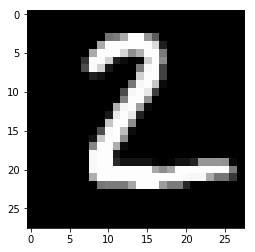

In [45]:
two_d = (np.reshape(X_test[1:2], (28, 28)) * 255).astype(np.uint8)
plt.imshow(two_d, interpolation='nearest',cmap='gray')